# Baby Name Analysis

Created 2021-02-15

Modified 2023-01-28

## Imports and Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Builtin module for lowercase letters
import string

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
plt.rcParams['figure.facecolor'] = 'w'
plt.rcParams['font.size'] = 14

In [4]:
pd.options.display.max_columns = 100

# Names of Babies born in 2021

Data source and limitations: https://www.ssa.gov/oact/babynames/background.html

In [5]:
df = pd.read_csv('../in/names/yob2021.txt', header=None)
df.columns = ['name', 'sex', 'count']
df

,name,sex,count
0,Olivia,F,17728
1,Emma,F,15433
2,Charlotte,F,13285
3,Amelia,F,12952
4,Ava,F,12759
...,...,...,...
31532,Zyeire,M,5
31533,Zyel,M,5
31534,Zyian,M,5
31535,Zylar,M,5


In [6]:
# All lowercase letters and space
az = list(string.ascii_lowercase) + [' ']
print(az)

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', ' ']


In [7]:
# Initialize an empty transition matrix to count occurrences of consecutive letters
M = pd.DataFrame(0, index=az, columns=az)

In [8]:
M.head()

,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t,u,v,w,x,y,z,
a,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
b,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
c,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
d,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
e,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Names of girls born in 2021

In [9]:
girls = df[df['sex'] == 'F'].reset_index(drop=True)
girls['name'].nunique()

17544

In [10]:
# Build non-normalized transition matrix.
# Each (row, col) entry counts how many times 
# the row letter was followed by the col letter.

# Count names to print progress
num_names = 0

for _, row in girls.iterrows(): 
    
    # Pad each name with whitespace so that:
    # ' ' followed by x captures a name starting with the letter x
    # x followed by ' ' captures a name ending with the letter x
    # Also, lowercase each name for simplicity
    name = ' ' + row['name'].lower() + ' '
    
    count = row['count']
    # For each transition between letters in this name:
    for x, y in zip(name, name[1:]):
        M.at[x, y] += count
    
    num_names += 1
    
    if num_names % 1000 == 0:
        print(f'Done {num_names} names and counting.')

Done 1000 names and counting.
Done 2000 names and counting.
Done 3000 names and counting.
Done 4000 names and counting.
Done 5000 names and counting.
Done 6000 names and counting.
Done 7000 names and counting.
Done 8000 names and counting.
Done 9000 names and counting.
Done 10000 names and counting.
Done 11000 names and counting.
Done 12000 names and counting.
Done 13000 names and counting.
Done 14000 names and counting.
Done 15000 names and counting.
Done 16000 names and counting.
Done 17000 names and counting.


In [11]:
# Write to Excel for subsequent visualization
# M.to_excel('../out/transition_matrix_F_2021_weighted_by_popularity.xlsx')

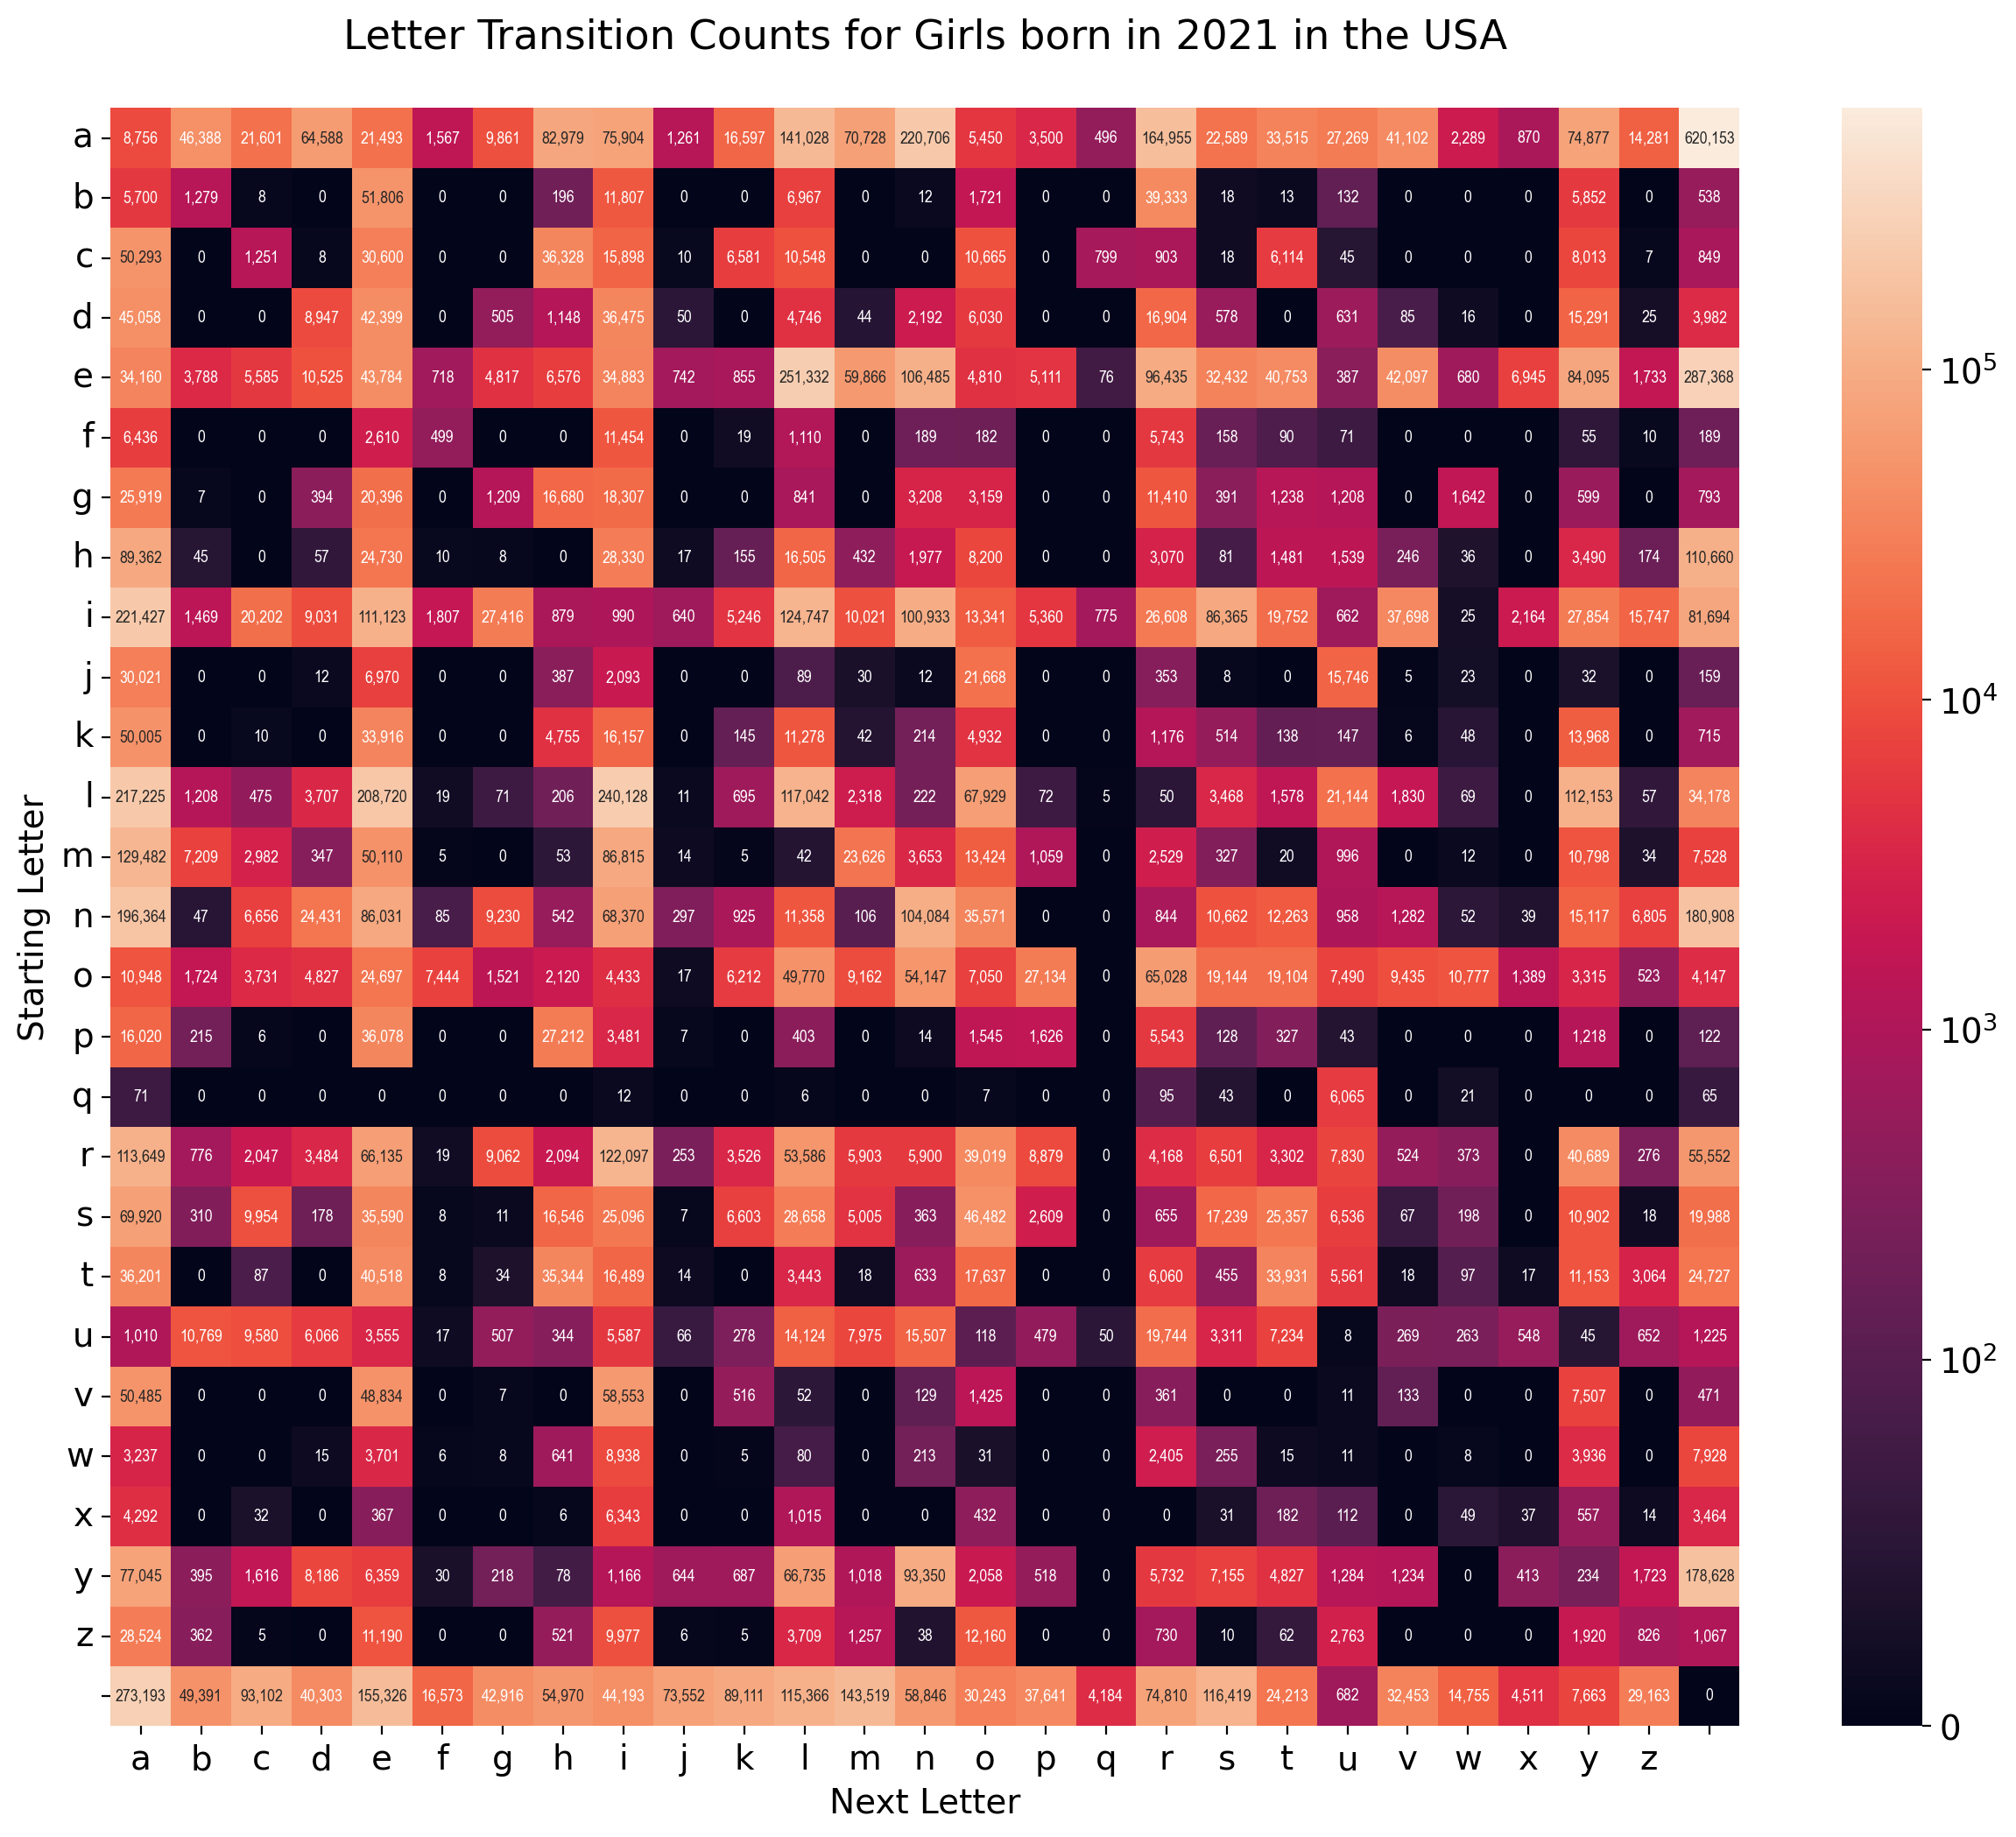

In [12]:
# Symmetrical logarithmic color scale
from matplotlib.colors import SymLogNorm

fig, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(M, 
            annot=True, 
            ax=ax, 
            fmt=',d', 
            norm=SymLogNorm(linthresh=1e2),
            annot_kws={
                'font': 'arial narrow', 
                'fontsize': 7}
           )

plt.yticks(rotation=0)

ax.set(xlabel='Next Letter',
       ylabel='Starting Letter',
       title='Letter Transition Counts for Girls born in 2021 in the USA\n');

## Normalize transition matrix

In [13]:
# Divide each row by its sum
M_normed = M.div(M.sum(axis=1), axis=0)

In [14]:
# Directly confirm that normalization worked as intended:
# Get row sums of normalized matrix. Expect all sums to be 1
M_normed.sum(axis=1)

a    1.0
b    1.0
c    1.0
d    1.0
e    1.0
f    1.0
g    1.0
h    1.0
i    1.0
j    1.0
k    1.0
l    1.0
m    1.0
n    1.0
o    1.0
p    1.0
q    1.0
r    1.0
s    1.0
t    1.0
u    1.0
v    1.0
w    1.0
x    1.0
y    1.0
z    1.0
     1.0
dtype: float64

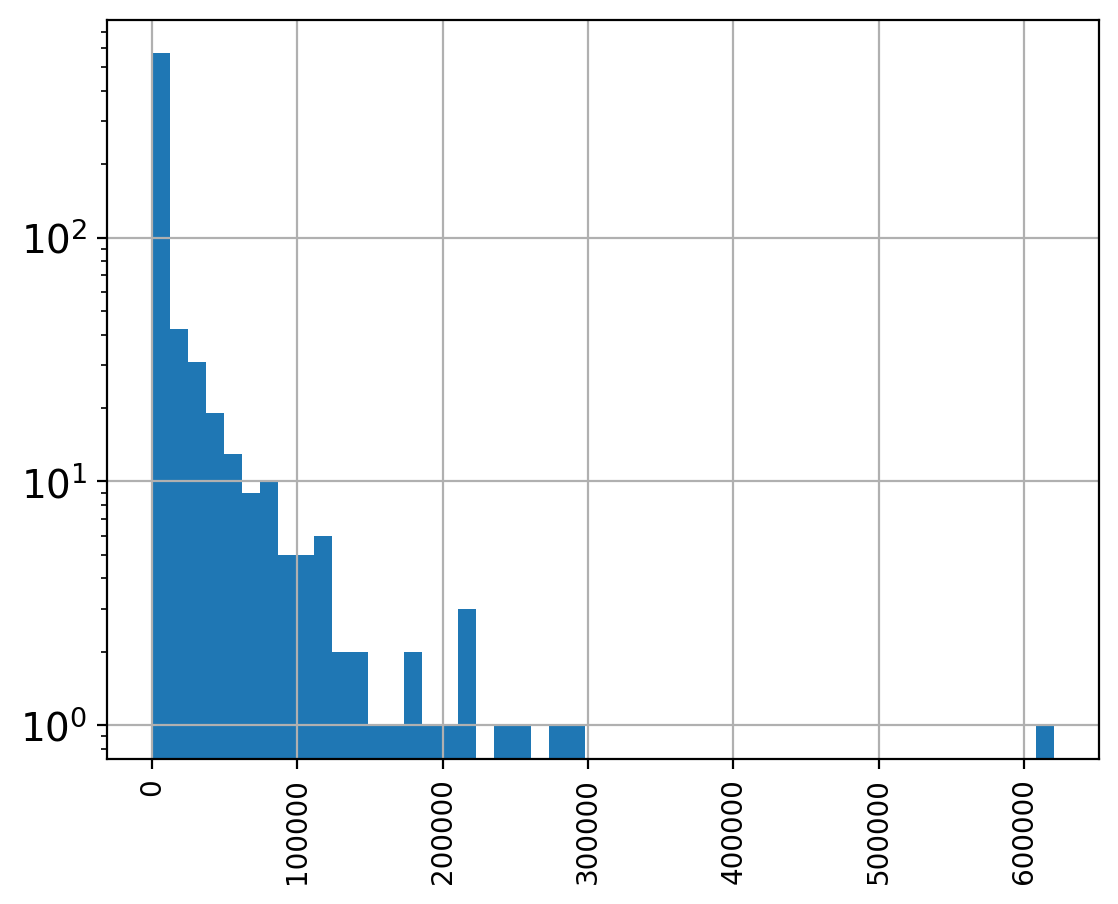

In [15]:
# Glance at histogram to eyeball a sensible colormap
M.stack().hist(bins=50, log=True)
plt.xticks(rotation=90, fontsize=10);

In [16]:
# Replace very small probabilities with nan to clean up heatmap;
M_normed_masked = M_normed.copy()
mask = M_normed_masked < 0.005
M_normed_masked[mask] = np.nan

# Express probabilities as percentages to clean up heatmap annotations
M_normed_masked = M_normed_masked.round(2) * 100

M_normed_masked.index = M_normed_masked.index.str.upper()
M_normed_masked.columns = M_normed_masked.columns.str.upper()

# Label space character
M_normed_masked.index = M_normed_masked.index.str.replace(' ', '(Name Start)')
M_normed_masked.columns = M_normed_masked.columns.str.replace(' ', '(Name End)')

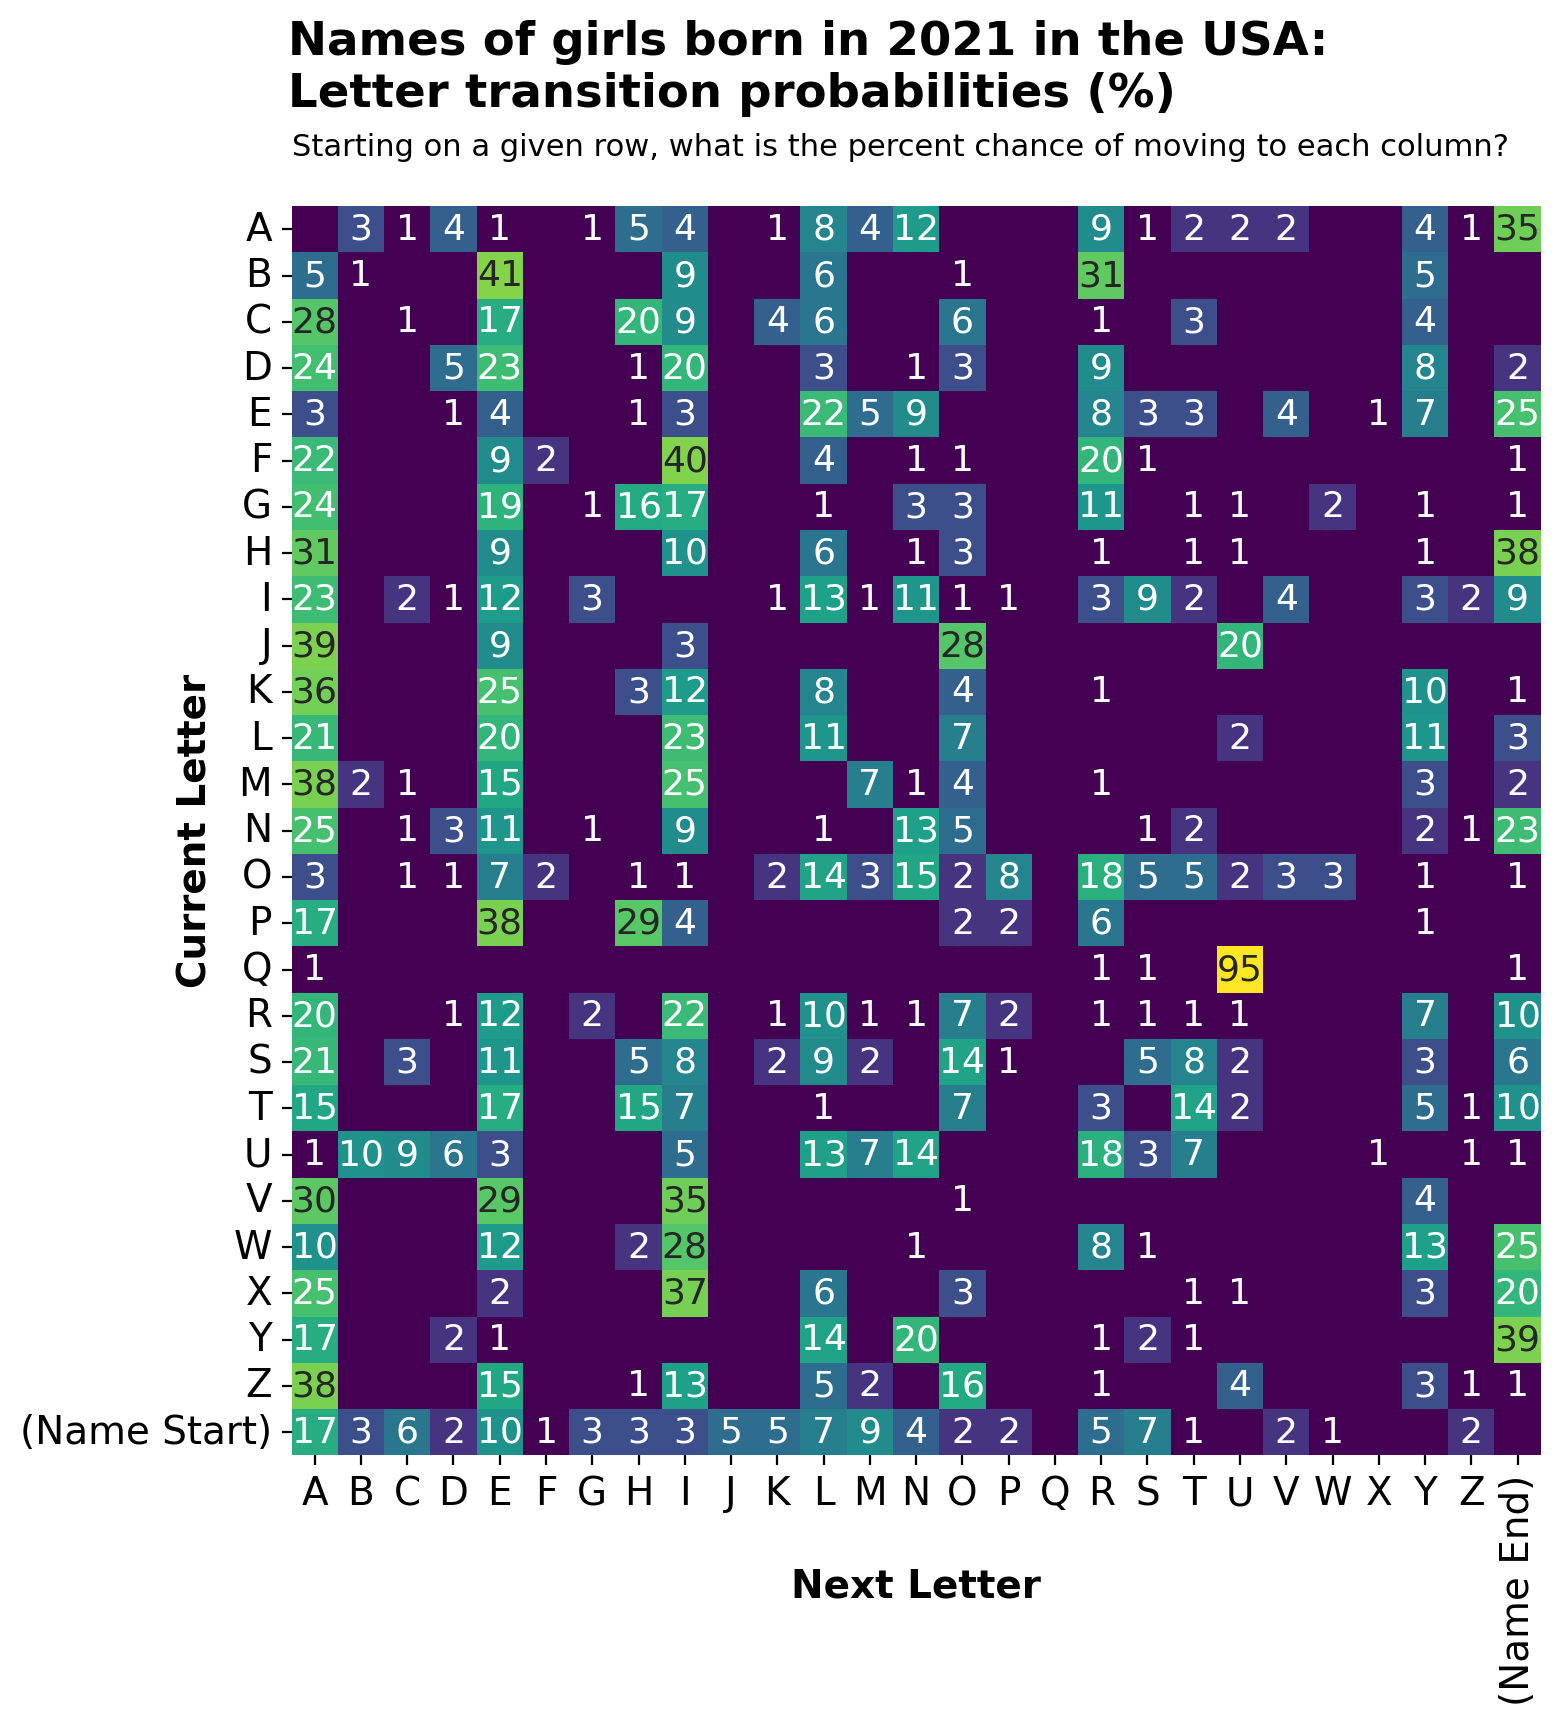

In [17]:
fig, ax = plt.subplots(figsize=(9, 9))
g = sns.heatmap(M_normed_masked, 
            annot=True, 
            ax=ax, 
            fmt='.0f', 
            cmap='viridis', 
            norm=SymLogNorm(linthresh=0.05),
            cbar=False,
            annot_kws={
#                'font': 'arial narrow', 
                'fontsize': 13}
           )

ax.set_aspect('equal')

color_of_zero = sns.color_palette('viridis', as_cmap=True)(0)
g.set_facecolor(color_of_zero)

plt.xticks(rotation=0)
plt.yticks(rotation=0)

# Rotate the last x tick label
x_tick_labels = ax.xaxis.get_ticklabels()
x_tick_labels[-1].set_rotation(90)

ax.set_xlabel('Next Letter', fontweight='bold', labelpad=-50)
ax.set_ylabel('Current Letter', fontweight='bold', labelpad=-70)

fig.suptitle(('Names of girls born in 2021 in the USA:\n'
              'Letter transition probabilities (%)'),
             fontweight='bold',
             horizontalalignment='left',
             x=0.225,
             y=0.96)
ax.set_title('Starting on a given row, what is the percent chance of moving to each column?\n',
             fontsize=11,
             horizontalalignment='left',
             x=0)

fig.tight_layout();

In [23]:
# fig.savefig('../out/transitions-pct-F-2021.png', bbox_inches='tight', dpi=300)

# Use transition matrix to generate new names

Results are expected to be hilariously bad, yet reflective of true letter transitions.

In [19]:
def generate_names(first_letter='a', n=1000):
    res = ''
    first_letter = first_letter.lower()
    current_letter = None

    for i in range(n):
        if current_letter is None:
            res += first_letter
            current_letter = first_letter
            
        next_letter = np.random.choice(M_normed.index, p=M_normed.loc[current_letter, :])
        res += next_letter
        current_letter = next_letter
        
    return res.title().split(' ')

In [20]:
np.random.seed(149)

names = [name for name in generate_names() if len(name) > 2]
print(', '.join(names))

Silian, Slya, Lialy, Maerollia, Chla, Zalah, Lay, Lonanaadievayle, Zoralepa, Peiemophaly, Dralesa, Wiada, Miea, Giaberosh, Bisodiaremanninenn, Seelanida, Einnn, Penasoetimala, Hepanelei, Mia, Mierolynakynisayloloneeloa, Qucama, Kliameyneprun, Alyle, Mma, Nnn, Jahlinacarya, Abili, Sow, Rellivyle, Histecyntayndie, Lut, Bey, Ylalelinnaleten, Zinna, Getodelorylen, Miledenimmiace, Vivi, Sicyainalasoveleia, Brarynndilabenee, Avia, Drlora, Aneyenina, Kle, Abilylannnt, Giey, Hay, Brisa, Isa, Nynnn, Fivivier, Vele, Arelyly, Ila, Iansolislal, Zia, Vamabrililasly, Shocaha, Lelilevanoph, Junna, Jakelomylia, Emahetonelian, Elelyollahaynah, Avievar, Min, Kedandielia, Nanala, Vamaja, Anghevenanty, Garailivela, Ommieteyli, Klon, Mai, Emisora, Zemailliy, Atteyanasy, Leynnalila, Keellori, Erannia, Phie, Scome, Alahiedan, Cadynaynay, Alisoali, Elynnahabra, Llaliselynneli, Cya, Vamigerpesy, Sola, Ena, Lia, Enarha, Lunanuerliadach, Lloeayn, Eeeriziceva, Slaize, Cani, Ieman, Edelenedya


In [21]:
# Try a different seed
np.random.seed(321)

names = [name for name in generate_names() if len(name) > 2]
print(', '.join(names))

Cke, Sargandniamilida, Eldyanempe, Pinahanariloma, Alian, Melivevilllohayasisa, Olyna, Die, Mizaramiceatelyalla, Jon, Adelun, Cesklienzolena, Zolyryn, Ema, Leyla, Aclan, Bra, Maeylises, Bryn, Khiemi, Sly, Annnlis, Aisyasa, Xily, Kara, Handanaria, Manla, Pama, Heyanama, Eylisidr, Brah, Llee, Anelerynaevega, Ayatryalofa, Mediza, Caniesty, Oliceeelys, Sannllora, Dassole, Sonnasse, Mmatarieleteyneroselasylin, Ailia, Aca, Amolisttadrona, Tulya, Emahe, Levia, Cha, Lah, Kyelivah, Raghadarielenaryn, Eninisannndaveterlaharry, Bononicemahoe, Elisoca, Eanah, Sha, Dlan, Ele, Adae, Son, Miolitelaidrallurokaha, Aharulya, Giesolova, Fsstlirlijanan, Phe, Benanturleatermy, Ameynnagrsli, Zol, Maiama, Laben, Hig, Pemie, Mis, Honara, Gra, Lemoemia, Eemaliaivinophloeigopelioneylluwa, Gnnnde, Joloanipa, Chylena, Qstikaelynaillany, Hlia, Jhisidrppela, Ppa, Kel, Jonon, Samiynoramima, Gexza, Key, Rivia, Melylia, Exiaelyca, Kli, Monsennddiaka, Emaildychierliseha, Kan, Lin, Miloviiy, Veva, Adele, Adia
